Alpha =10.0
Beta =3.0


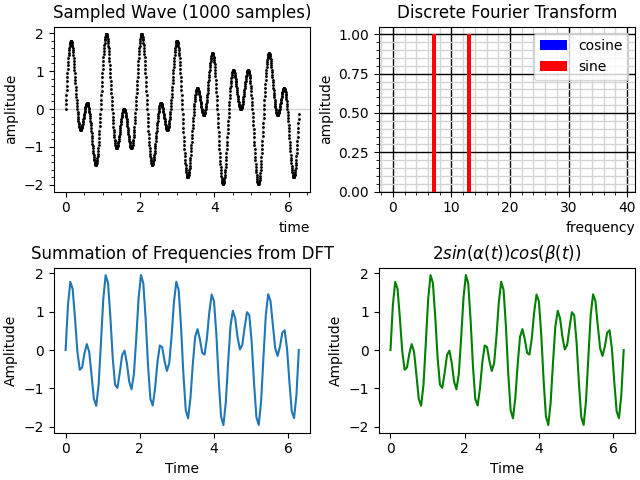

In [3]:
"""unknown_wave.ipynb"""

# This code identifies the 𝛼 and 𝛽 constants from the given data set generated from the equation 𝑦(𝑡)=2 sin⁡(𝛼𝑡)cos⁡(𝛽𝑡),0≤𝑡<2𝜋.

# Code is mostly copied from that given by Dr. David Biersach in fourier_discrete.ipynb. 

# Allows for annotations and type hints 
from __future__ import annotations

# Allow for type hints
import typing

# Used for plotting
import matplotlib.pyplot as plt
# Used for calculations
import numpy as np
# Allow for minor ticks
from matplotlib.ticker import AutoMinorLocator

# For type checking
if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

# Allow for the side bar menu 
%matplotlib widget

# Initialize the max frequency 
max_freq: int = 40

# fmt: off

def dft(ts: NDArray[np.float_],
        ys: NDArray[np.float_]
    )-> tuple[NDArray[np.float_], NDArray[np.float_]]:
    """Compute the dft"""
    # pass in time stamps and sample values 
    # figure out the rays of amplitude cos and sin values

    #number of our samples 
    num_samples: int = ts.size
    # what frequency should we count to? Must be num_samples/2
    # round down with int to get highest detectable frequency we can possibly see 
    # https://en.wikipedia.org/wiki/Nyquist_frequency
    num_terms: int = int(num_samples / 2)  # Nyquist limit

    # Create 0 arrays for the number of terms for the amplitudes 
    a_cos: NDArray[np.float_] = np.zeros(num_terms)
    b_sin: NDArray[np.float_] = np.zeros(num_terms)

    # Outer for loop 
    # term= frequency or wavenumber, go up to but not including num_terms 
    # how much does a simple frequency affect a complex wave 
    for term in range(0, num_terms):
        a: float = 0.0
        b: float = 0.0
        for sample in range(0, num_samples):
            # sample from 0 to the number of samples 
            # a and b are accumulators initialized to 0 
            # inner loop goes across all samples 
            # Fourier-> sum up cos (current wavenumber*time stamp at that sample), then multiply that by the sample value, then multiply that by 2
            a += 2 * np.cos(term * ts[sample]) * ys[sample]
            b += 2 * np.sin(term * ts[sample]) * ys[sample]
        # save the division to the end because samples is a constant 
        # divide by the number of samples 
        a_cos[term] = round(a / num_samples, 8) + 0
        b_sin[term] = round(b / num_samples, 8) + 0

    # the very first cos-> you don't multiply by 2 
    # so divide the first terms by 2 
    # a_cos[0]-> average value (aka offset or dc value)
    a_cos[0] /= 2
    b_sin[0] /= 2
    # return a tuple of two arrays 
    # dft ultimately shows only 4 frequency values and 4 amplitude values 
        # so 8 numbers in the frequency domain can describe the complexity of the wave in the time domain (2000 numbers)
    return a_cos, b_sin

def plot_samples(ts: NDArray[np.float_], ys: NDArray[np.float_], ax: Axes) -> None:
    """Plot the sampled wave from ts and ys"""
    ax.set_title(f"Sampled Wave ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray", linewidth=1)

    # fmt: off
    ax.plot(ts, ys, color="lightgray",
            marker="o", markerfacecolor="none",
            markersize=1, markeredgecolor="black")
    # fmt: on

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

def plot_dft(a_cos: NDArray[np.float_], b_sin: NDArray[np.float_], ax: Axes) -> None:
    """Plot the dft based on b_sin and a_cos frequencies using bar graphs """
    ax.set_title("Discrete Fourier Transform")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel("amplitude")

    highest_freq: int
    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = (
            max(int(np.amax(np.nonzero(a_cos))), int(np.amax(np.nonzero(b_sin)))) + 1
        )

    # fmt: off
    
    ax.bar(range(0, highest_freq), a_cos[:highest_freq],
           label="cosine", color="blue", zorder=2)
    
    ax.bar(range(0, highest_freq), b_sin[:highest_freq],
           label="sine", color="red", zorder=2)

    # fmt: on

    ax.legend(loc="best")

    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

def dft_sum(t:NDArray [np.float_], non_zero_freq:NDArray[np.float_], ax:Axes)-> None: 
    """Plot the dft sum"""
    ax.set_title("Summation of Frequencies from DFT")
    # time vs amplitude 
    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")
    # a is the first non zero frequency, b is the second 
    a:int= non_zero_freq[0]
    b:int = non_zero_freq[1]
    # Dft values are a sum of the sin's of t at a and b 
    dft_values: NDArray [np.float_]= np.sin(a*t)+np.sin(b*t)
    # Plot t vs dft sum 
    ax.plot (t, dft_values)

def plot_actual_werner (t:NDArray [np.float_], non_zero_freq: NDArray [np.float_], ax:Axes)-> None: 
    """Plot the actual equation 𝑦(𝑡)=2 sin⁡(𝛼𝑡)  cos⁡(𝛽𝑡)-> using the werner trig formulas and the a and b values found from the dft"""
    # Set title using latex 
    ax.set_title(rf"$2sin(\alpha(t))cos(\beta(t))$")
    # time vs amplitude 
    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")
    # a is the first non zero frequency, b is the second 
    a:int= non_zero_freq[0]
    # a=7
    b:int = non_zero_freq[1]
    # b=13
    # 2sin(alpha)cos(beta)	=	sin(alpha-beta)+sin(alpha+beta)
        # a= alpha - beta, b= alpha+beta 
        # alpha= 10
        # beta= 3
    # calculate and print alpha and beta 
    alpha:float= (a+b)/2
    print (f"Alpha ={alpha}")
    beta: float= (b-a)/2
    print (f"Beta ={beta}")
    
    # Calculate based on a and b and  𝑦(𝑡)=2 sin⁡(𝛼𝑡)  cos⁡(𝛽𝑡)
    actual_values: NDArray [np.float_]= 2*np.sin(alpha*t)*np.cos(beta*t)
    # Plot t vs actual in green 
    ax.plot (t, actual_values, color = "green")

def analyze(file_name: str) -> None:
    # we can generate a multidimensional array from a data file using np.genfromtxt
    samples: NDArray[np.float_] = np.genfromtxt(file_name, delimiter=",")
    # We know the array is 2d 
    # So we should slice up the 2d matrix into two columns 
    # : start,stop,step -> singular : means give us everything 
    # But since samples is a 2d array, so we only want the first column so use ,0

    ts: NDArray[np.float_] = samples[:, 0]
    # now we want the second column
    ys: NDArray[np.float_] = samples[:, 1]

    # Individually type hint in a tuple 
    a_cos: NDArray[np.float_]
    b_sin: NDArray[np.float_]
    # Ultimately we are trying to create an array of amplitudes
    # call dft and give it the arrays to return two arrays of amplitudes 
        # cos's usually have amplitudes a 
             # a_cos -> an array of amplitudes, many of them will be 0's 
                # First element= amplitude with cos frequency so first element is 1 because of cos(0)
                # First element of sin is 0 
    # waves with integer frequencies 
    # get frequency views 
    a_cos, b_sin = dft(ts, ys)

    # Find out where the non zero amplitudes are occurring 
    non_zero_freq: NDArray [np.float_]= np.array (np.where(b_sin !=0))
    # ravel the non_zero_freq array such that it is 1D
    non_zero_freq= np.ravel(non_zero_freq)
    # Define t from 0 to 2pi
    t: NDArray [np.float_]= np.linspace (0,2*np.pi, 100)


    # open up a plot window 
    plt.close("all")
    plt.figure(file_name, constrained_layout=True)
    # multiple plots on the same figure 
    # original data file plot in the top left 
    plot_samples(ts, ys, plt.subplot(221))
    # top right dft with y axis as amplitude
    plot_dft(a_cos, b_sin, plt.subplot(222))
    # Plot the result of the summation of the highest freq's from the dft
    dft_sum (t, non_zero_freq, plt.subplot (223))
    # Plot the actual equation 𝑦(𝑡)=2 sin⁡(𝛼𝑡) cos⁡(𝛽𝑡)
    plot_actual_werner (t, non_zero_freq, plt.subplot(224))
    # Then, show the plot 
    plt.show()

analyze("unknown_wave.csv")